Overtopping over constant slope dike 
==============================================

Description
-----------
This application has been set up as a demonstration of the ability of proteus to simulate overtopping over a an arbitrary geometry.  


![floodwall.png](../floodwall.png)


Running the test case
-----

To run the test case type:

```
parun floodwall.py --TwoPhaseFlow  -v -D result_folder
```

Wave properties can be modified by the commandline, using for example:

```
parun floodwall.py --TwoPhaseFlow -v -D result_folder -C "mwl=0.3"
```

To run in parallel (example with mpirun and 12 processors):

```
mpirun -np 12 floodwall.py --TwoPhaseFlow -v -D result_folder -C "mwl=0.3"
```


To see guidance on parun options, you can type  

```
parun -h
```





## Running the numerical model in the shell

The `parun` launcher is used to execute the split-operator module, in this case `floodwall.py`. Various arguments may also be implemented to define various runtime options. All available options are listed when executing `parun -h` in the command line. Common command-line options are as follows:

**Option** | **Description**
:---: | :---:
 -v   | Print logging information to standard output
 -O PETSCOPTIONSFILE  | Text file of options to pass to Petsc library
 -D DATADIR | Set data directory for output storage
 -l LOGLEVEL | Store runtime information at the log level, 0 = none, 10 = everything
 -b BATCHFILENAME | Text file of auxiliary commands to execute along with main program
 -G gatherArchive | Collect data files into single file at end of simulation (will require more computational resources on large runs)
 -H hotStart | Use the last step in the archive as the initial condition and continue appending to the archive
 
 
Additionally, to run the case on more than one core, implement `mpiexec -n <number of cores>` before the use of `parun` on the command line. 




In [ ]:
!mpiexec -np 2 parun --TwoPhaseFlow floodwall.py -v -l 1 -C "he=0.025 dt_output=0.1" -D data

[       0] Running Proteus version 1.7.4.dev0
[       3] Setting initial conditions
[       3] Starting time stepping
[       3] ==============================================================
[       3] Solving over interval [ 0.00000e+00, 1.00000e-03]
[       3] ==============================================================
[      11] ==============================================================
[      11] Solving over interval [ 1.00000e-03, 1.00000e-01]
[      11] ==============================================================
[      40] ==============================================================
[      40] Solving over interval [ 1.00000e-01, 2.00000e-01]
[      40] ==============================================================
[      64] ==============================================================
[      64] Solving over interval [ 2.00000e-01, 3.00000e-01]
[      64] ==============================================================
[      78] ===================================

## Post-process the numerical solution

In [1]:
!rm -f png/floodwallphi*.png;

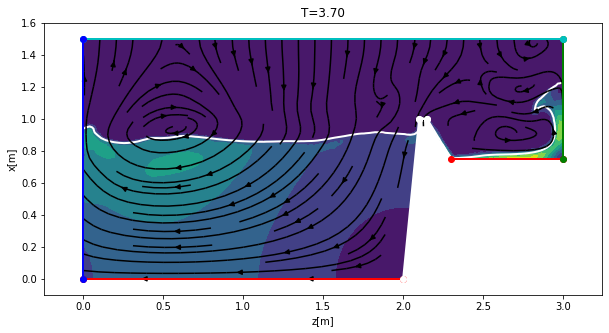

In [1]:
import helpers
helpers.CreateFig(0.1,'data/floodwall.h5','png/floodwall','floodwall')

In [2]:
!rm -f mp4/floodwall.mp4; LD_LIBRARY_PATH='' ffmpeg -i png/floodwallphi%4d.png -vcodec h264 mp4/floodwall.mp4 -loglevel quiet

In [3]:
## Display the solution

In [4]:
from ipywidgets import Video
video = Video.from_file("mp4/floodwall.mp4", loop=False, controls=True, autoplay=True)
display(video)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x0c\xdcfmdat\x00\x…